In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv('intmodes_TEST.csv')
df.set_index('Mode', inplace=True)
df.head()

,Wn,Mol%,Sur%,Mix%
Mode,,,,
1,34.1375,41.872562,34.330299,23.797139
2,36.1098,14.267016,6.937173,78.795812
3,51.0604,21.401274,17.834395,60.764331
4,73.6132,19.024970,53.864447,27.110583
5,78.4098,38.978829,21.295143,39.726027


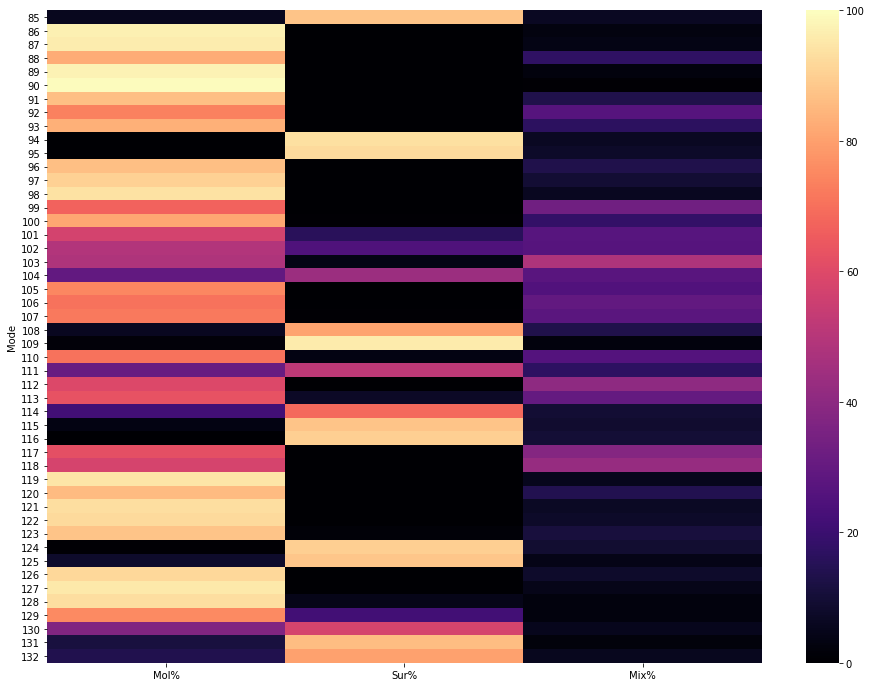

In [19]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df[df['Wn'].between(1000, 1800)].drop('Wn', axis=1), vmin=0, vmax=100, cmap='magma')

In [64]:
stx = pd.read_excel('stx.xlsx')
stx.set_index('mode-index', inplace=True)
stx.head()

,mode,wn,SL,123,125,157,160,171,176,177
mode-index,,,,,,,,,,
64,A,1166.7,1.31,2.041249e+06,0.000,150884.3809,1.923373e+05,282160.0254,4.991146e+05,0.000
67,B,1240.5,1.53,7.241208e+06,0.000,404516.0500,5.729985e+05,487583.9574,1.546250e+06,9898062.614
76,C,1376.6,6.86,1.146700e+06,0.000,190856.9439,4.720453e+05,347338.8360,3.765309e+06,0.000
85,D,1496.4,6.59,7.040555e+05,8649973.159,76133.8699,1.006222e+05,17151.4045,1.769879e+05,2839383.219
88,E,1595.8,4.09,3.046622e+06,1417001.010,387698.6752,2.305114e+06,27443.6674,9.349946e+04,3426710.542


In [89]:
ef = stx[[123, 125, 157, 160, 171, 176, 177]].apply(lambda x:np.log10(x/stx['SL']))
ef.replace(-np.inf, 0, inplace=True)
ef

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


,123,125,157,160,171,176,177
mode-index,,,,,,,
64,6.192625,0.000000,5.061373,5.166792,5.333224,5.580929,0.000000
67,6.675120,0.000000,5.422244,5.573462,5.503358,6.004588,6.810859
76,5.223126,0.000000,4.444384,4.837660,4.704429,5.739477,0.000000
85,5.028721,6.118129,4.062692,4.183809,3.415414,4.429058,5.634339
88,5.872095,5.539647,4.976771,5.750969,3.826719,4.359086,5.923154
90,0.000000,0.000000,6.127792,6.963600,4.361501,4.247604,0.000000
91,6.230659,0.000000,5.998395,5.835911,4.342256,5.836201,6.285971
94,6.039078,0.000000,6.269571,5.560252,5.066883,6.571542,0.000000
95,5.891660,0.000000,4.369309,3.796989,4.756103,5.302527,0.000000


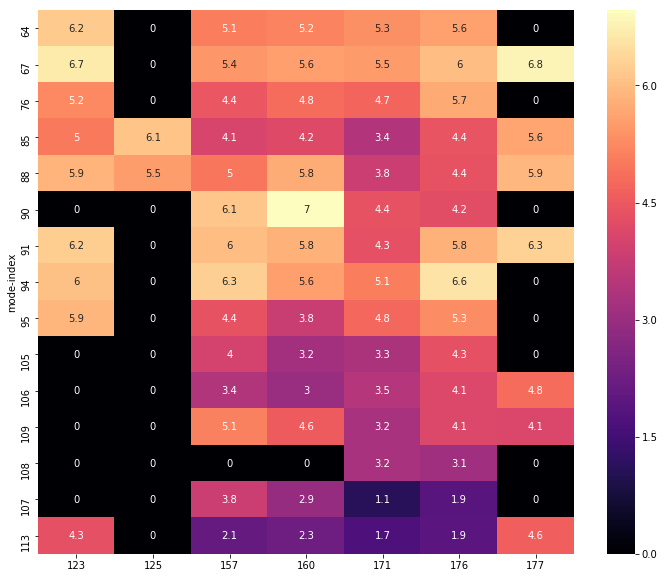

In [91]:
plt.figure(figsize=(12,10))
sns.heatmap(data=ef, annot=True, cmap='magma')

In [191]:
fakedf = pd.DataFrame(index=np.arange(1, 101))
fakedf.index.name = 'mode'
fakedf['Wn'] = np.linspace(0, 4000, 100)
fakedf['Mol%'] = np.abs(np.random.rand(100))*70 + 30
fakedf['Sur%'] = fakedf['Mol%'].apply(lambda x:(100 - x)*np.random.rand())
fakedf['Mix%'] = 100 - (fakedf['Mol%'] + fakedf['Sur%'])
fakedf.head()

,Wn,Mol%,Sur%,Mix%
mode,,,,
1,0.000000,89.258999,8.826128,1.914872
2,40.404040,86.133535,7.573422,6.293043
3,80.808081,81.017958,15.073506,3.908536
4,121.212121,53.708822,22.293245,23.997933
5,161.616162,95.673681,1.544781,2.781538


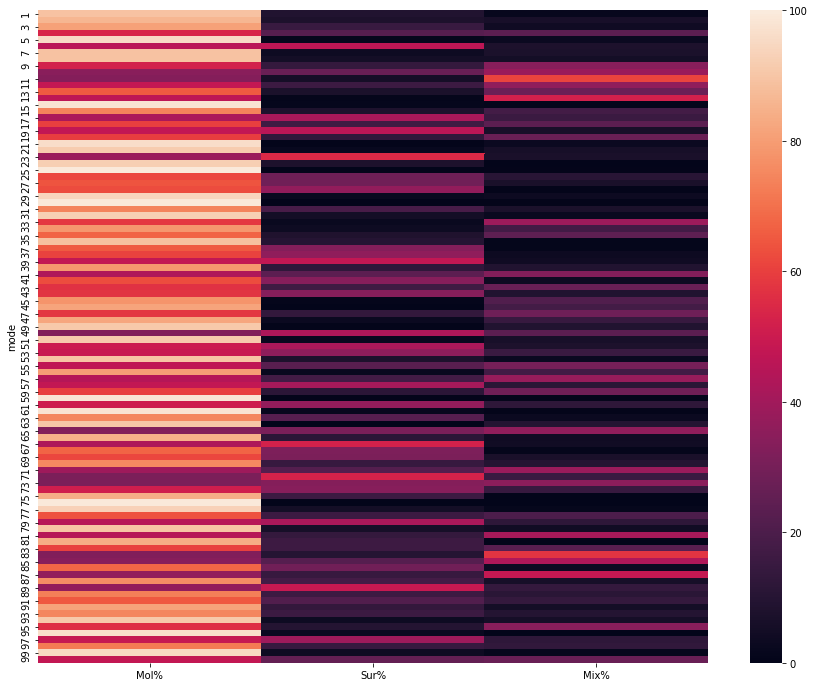

In [192]:
plt.figure(figsize=(15, 12))
sns.heatmap(fakedf.drop('Wn', axis=1), vmax=100, vmin=0)

In [193]:
fakespec = pd.read_csv('fake-spectrum.csv')
fakespec.head()

,Intensity
0,13811.948
1,24726.305
2,115083.808
3,29714.664
4,34584.149


In [203]:
for nm in range(400, 601, 5):
    start = np.random.randint(0, 10)
    multi = np.random.rand()*(nm - 399)*1000
    spec = np.concatenate((fakespec['Intensity'].values[start:], fakespec['Intensity'].values[:start]))*multi
    fakedf['{} nm'.format(nm)] = np.log10(spec)
fakedf.head()

,Wn,Mol%,Sur%,Mix%,400 nm,405 nm,410 nm,415 nm,420 nm,425 nm,...,555 nm,560 nm,565 nm,570 nm,575 nm,580 nm,585 nm,590 nm,595 nm,600 nm
mode,,,,,,,,,,,,,,,,,,,,,
1,0.000000,89.258999,8.826128,1.914872,7.990587,8.007841,8.213929,8.713958,9.148314,8.507671,...,7.138905,9.602345,8.982284,8.246594,9.580186,8.890265,10.085061,9.956785,9.518253,9.672941
2,40.404040,86.133535,7.573422,6.293043,7.797440,8.675696,8.350822,8.961851,8.560271,9.180726,...,7.269916,9.739238,8.394240,8.312500,9.646092,9.563320,10.221955,10.087797,10.191308,10.340796
3,80.808081,81.017958,15.073506,3.908536,8.045334,8.087653,8.481834,8.861135,8.626177,9.317619,...,7.076769,9.870250,8.460147,8.094631,9.428224,9.700213,10.352966,9.894650,10.328201,9.752753
4,121.212121,53.708822,22.293245,23.997933,7.944618,8.153559,8.288687,7.765598,8.408308,9.448631,...,7.324663,9.677103,8.242278,8.767686,10.101278,9.831225,10.159820,10.142543,10.459213,9.818659
5,161.616162,95.673681,1.544781,2.781538,6.849081,7.935690,8.536581,9.332598,9.081363,9.255484,...,7.223947,9.924997,8.915332,8.904579,10.238171,9.638078,10.407713,10.041827,10.266066,9.600790


In [204]:
nm_cols = [col for col in fakedf.columns if 'nm' in col]

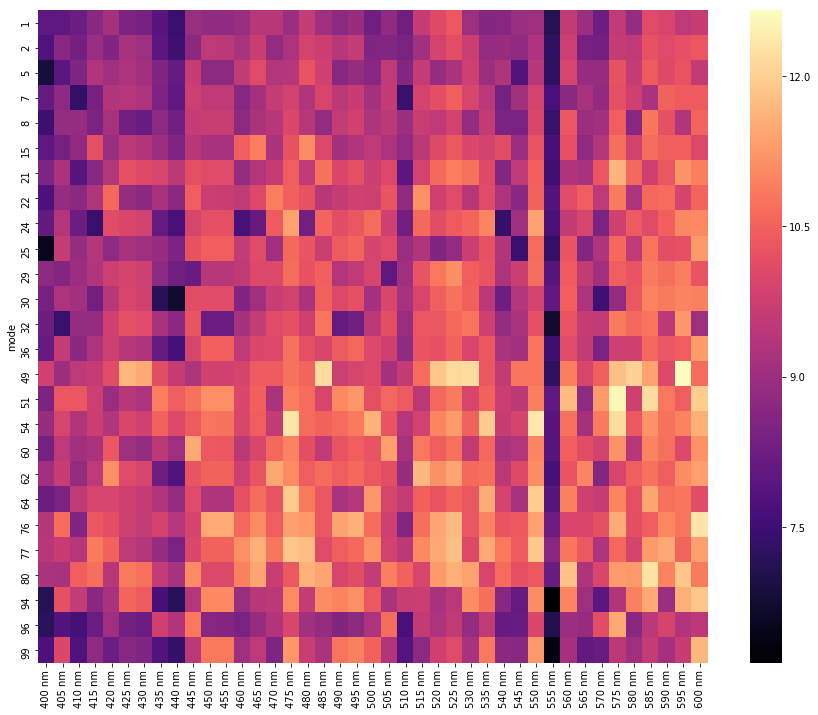

In [207]:
plt.figure(figsize=(15, 12))
sns.heatmap(fakedf[nm_cols][(fakedf['Mol%'] > 85) & (fakedf['Sur%'] < 10)], cmap='magma')